### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

**自变量：墨色和内容一样/不一样的文字列表。**  
**因变量：说出墨色名称的时间。**

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

**$H_{0}$**：$μ_{c}$ = $μ_{i}$  
**$H_{1}$**：$μ_{c}$ ≠ $μ_{i}$  
其中：  
$μ_{c}$是一致文字条件下说出列表墨色名称的平均时间；  
$μ_{i}$是不一致文字条件下说出列表墨色名称的平均时间。  
  
**由于测试样本为24组dependent sample, 总体标准差σ未知，备择假设是$μ_{c}$ ≠ $μ_{i}$，因此选择双尾T检验。**

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# 导入数据
df=pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**一致文字条件下样本平均耗时14.05s，中位数为14.36s，标准差为3.56s；  
不一致文字条件下样本平均耗时22.02s，中位数为21.02s，标准差为4.80s；**


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

C:\Users\Cheryl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Cheryl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Histogram')

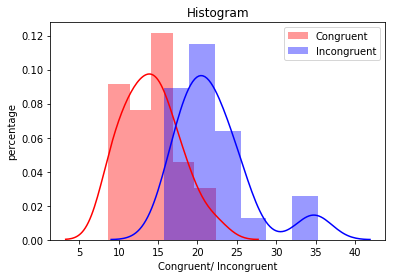

In [9]:
# 在这里创建可视化图表
sns.distplot(df.Congruent, kde=True,color='r',label="Congruent")
sns.distplot(df.Incongruent, kde=True,color='b',label="Incongruent")
plt.legend()
plt.ylabel('percentage')
plt.xlabel('Congruent/ Incongruent')
plt.title('Histogram')

Text(0.5,1,'Bar plot of time diff of all samples')

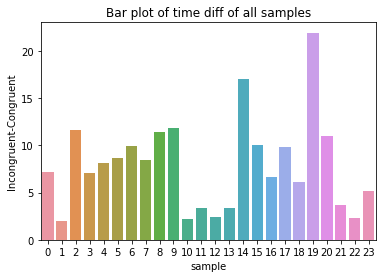

In [4]:
sns.barplot(y=df.Incongruent-df.Congruent,x=df.Incongruent.index)
plt.ylabel('Incongruent-Congruent')
plt.xlabel('sample')
plt.title('Bar plot of time diff of all samples')

**图1：由直方图可观察到，不一致文字条件下的时间分布在一致条件的时间分布右侧，也就是说不一致文件条件的整体用时更长。  
一致时间条件下的用时在10s-23s之间，不一致时间条件下的用时在15s-35s之间。  **
  
**图2：由条形图可见，每个独立样本不一致条件用时减一致时间条件用时均大于0，即在文字和颜色不一致的情况下，每个参与者念出正确列表都花费了更长的时间。**

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [5]:
# 在这里执行统计检验, 计算 t-score和p-value
from scipy import stats

stats.ttest_rel(df.Incongruent, df.Congruent)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)

**计算alpha=.05条件下的t critial value:**

In [10]:
alpha = 0.05
stats.t.ppf(1-alpha/2,23)

2.0686576104190406

t检验求得的t-statistic为8.0207，大于t critial value 2.0687。同时求得P值为4.103e-8，小于0.05。因此拒绝零假设，认为$μ_{c}$ ≠ $μ_{i}$ 。  
因t-statistic落在右侧的critial region，还可进一步判断$μ_{c}$ < $μ_{i}$。

这一结果与期望一致，也与自行尝试 Stroop 任务得出的结果一致。

## Resources:  
https://blog.csdn.net/cymy001/article/details/78418432  
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html  
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html  
https://blog.csdn.net/pipisorry/article/details/49515215  
https://www.programcreek.com/python/example/94816/scipy.stats.t.ppf